In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import timm
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet

import albumentations as A
from albumentations.pytorch import ToTensorV2

# Loading the base file

In [2]:
image_path = Path("/notebooks/data/CamVid/train/0001TP_009210.png")
mask_path = Path("/notebooks/data/CamVid/train_labels/0001TP_009210_L.png")

In [3]:
image = np.asarray(Image.open(image_path))
mask = np.asarray(Image.open(mask_path))

# Choosing augmentations and showcasing them

In [7]:
transform = A.Compose([
    A.HorizontalFlip(p=0.6),
    A.RandomCrop(512, 512), # For demonstration purposes :)
    A.RandomBrightnessContrast(p=0.5),
])

In [8]:
num_samples = 8

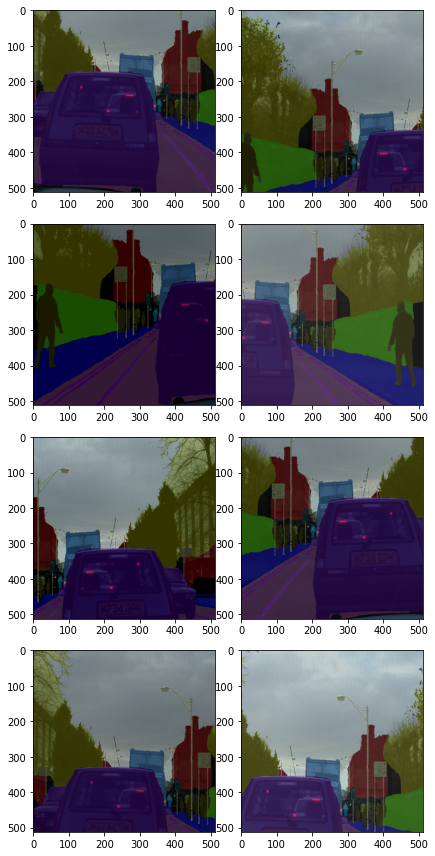

In [9]:
fig, axes = plt.subplots(num_samples//2, 2, figsize=(6, 3 * num_samples // 2))
for ax in axes.ravel():
    transformed = transform(image=image, mask=mask)
    image_transformed = transformed["image"]
    mask_transformed = transformed["mask"]
    ax.imshow(image_transformed)
    ax.imshow(mask_transformed, alpha=0.4)
plt.tight_layout()